In [1]:
from scipy.stats import lognorm
from scipy.stats import norm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# previous hazard curve 
x = np.logspace(-2, np.log10(2), num=100) # IM values to consider 

# lognormal parameters
thetaIM = 0.5 # assumed fragility median
beta_R = 0.4 # assumed fragility aleatory beta
beta_U = 0.4 # assumed fragility epistemic beta

([<matplotlib.axis.XTick at 0x7ff243902ca0>,
 <a list of 5 Text major ticklabel objects>)

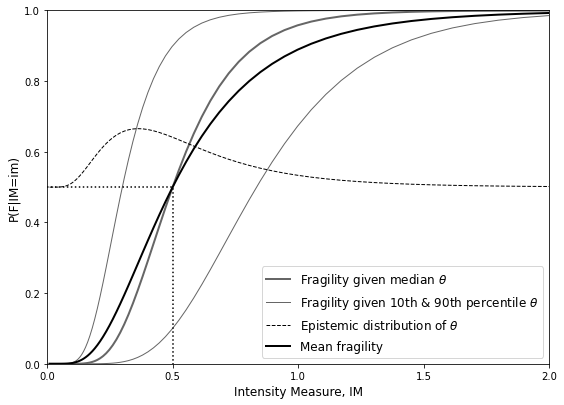

In [3]:
# illustrate fragility
beta_T = np.sqrt(beta_R ** 2 + beta_U ** 2)

fragilityAleatory = norm.cdf(np.log(x), np.log(thetaIM), beta_R)

fragilityAleatoryFrac = [norm.cdf(np.log(x), np.log(thetaIM)+1.28*beta_U, beta_R), \
                         norm.cdf(np.log(x), np.log(thetaIM)-1.28*beta_U, beta_R)]

epistemicPDF = 0.5 + 0.1 * lognorm.pdf(x, beta_T, loc=0, scale=thetaIM)

fragilityTotal = norm.cdf(np.log(x), np.log(thetaIM), beta_T)

# Plot Fig 9.11
plt.figure(figsize=(9, 6.5))
plt.plot(x, fragilityAleatory, linestyle='-', linewidth=2, color=[0.4, 0.4, 0.4], label=r'Fragility given median $\theta$')
plt.plot(x, fragilityAleatoryFrac[0], linestyle='-', linewidth=1, color=[0.4, 0.4, 0.4], label=r'Fragility given 10th & 90th percentile $\theta$')
plt.plot(x, fragilityAleatoryFrac[1], linestyle='-', linewidth=1, color=[0.4, 0.4, 0.4])
plt.plot(x, epistemicPDF, '--k', linewidth=1, label=r'Epistemic distribution of $\theta$')
plt.plot(x, fragilityTotal, '-k', linewidth=2, label='Mean fragility')
plt.plot([0, thetaIM, thetaIM], [0.5, 0.5, 0], ':k')
plt.legend(loc='lower right', fontsize=12) 
plt.xlabel('Intensity Measure, IM', fontsize=12)
plt.ylabel('P(F|IM=im)', fontsize=12)
plt.ylim(0,1)
plt.xlim(0,2)
plt.xticks(np.arange(0, 2.5, step = 0.5))